### Brazilian Weather Database

- Our dataset covers hourly weather data from 122 weathers stations of the southeast region of Brazil from 2000 - 2016. The southeast include the states of Rio de Janeiro, São Paulo, Minas Gerais & Espirito Santo. 

- 17 climate parameters in total. Collected by INMET (National Meteorological Institute - Brazil)


Includes: 
- Air pressure
- Temperature
- Humidity
- Dew Point
- Solar Radiation
- Wind Speed, Direction, and Gust
- Precipitation


### Research Questions


The purpose of this project was to clean up the data and to start to summarize it.

The input was a .csv file from kaggle, 31 columns, 9,779,168 rows representing hourly recordings of weather data from 122 different weather stations.

A cleaned version of the data was saved as an .hdf file, which we used to start a basic summary.

### General problems with weather data

- Time series data. 

- Weather sensors are finnicky and liable to break/lose connectivity and report incorrect readings for that hour.

- Not all weather stations seemed to have access to every sensor --> No wind or precip data for a few stations. 

- Instances where entire station goes offline, reports 0/NaN values for all columns.

- Some stations did not capture wind gust data, though they have wind direction and speed. Then some stations do not capture all 3 measurements.

- Not all stations came online at the same time. Some start at 2000. Some start later. Some went out of commission for a few months or years and then came back online. Huge gaps in the data because of this. 


### Problems with specific measurements

- 0 and NaN were used interchangably:

- Intermitent missing/zero values in all columns. Mostly one hour missing here and there.

- Solar radiation gives NaN values when the sun sets each day. About 43% of our solar readings are NaN. Assumption -> no solar radiation at night. Changed all Nan's to 0
- Precipitation gives Nan values for each hour it does not rain. Assumption -> no rain during NaN values. Changed all NaN's to 0

- In other cases, missing values were reported as 0, even for measures that cannot be 0 (air pressure, humidity).

### Cleanup Methods

- NaN values (solar radiation, precipitation): convert to 0 values

- 0 values (temp, humidity, dewpoint): convert to NaN, then interpolate.

    - Using Pandas Interpolation worked very well to fill in the gaps. For example, may have temperature readings like this:


        - hour temp
        - 10    27
        - 11    27.8
        - 12    0
        - 13    28.4
        - 14    28.2

- Rows of all 0 values: deleted, assuming that station was offline for that measurement period (n = 619,969).


### Analysis & Visualization



### Count NaN and 0 values:
    
|              	|   	|     NaN 	|   	|      0 	|
|--------------	|---	|--------:	|---	|-------:	|
| wsid         	|   	|       0 	|   	|      0 	|
| wsnm         	|   	|       0 	|   	|      0 	|
| elvt         	|   	|       0 	|   	|  71760 	|
| lat          	|   	|       0 	|   	|  71760 	|
| lon          	|   	|       0 	|   	|  71760 	|
| inme         	|   	|       0 	|   	|      0 	|
| city         	|   	|       0 	|   	|      0 	|
| prov         	|   	|       0 	|   	|      0 	|
| date         	|   	|       0 	|   	|      0 	|
| yr           	|   	|       0 	|   	|      0 	|
| mo           	|   	|       0 	|   	|      0 	|
| da           	|   	|       0 	|   	|      0 	|
| hr           	|   	|       0 	|   	| 407466 	|
| prcp         	|   	| 8371184 	|   	| 746679 	|
| stp          	|   	|       0 	|   	| 701723 	|
| smax         	|   	|       0 	|   	| 705438 	|
| smin         	|   	|       0 	|   	| 705358 	|
| gbrd         	|   	| 4108820 	|   	| 879490 	|
| temp         	|   	|      31 	|   	| 628611 	|
| dewp         	|   	|     475 	|   	| 705849 	|
| tmax         	|   	|      26 	|   	| 631473 	|
| dmax         	|   	|     310 	|   	| 706613 	|
| tmin         	|   	|      34 	|   	| 631410 	|
| dmin         	|   	|     807 	|   	| 714946 	|
| hmdy         	|   	|       0 	|   	| 679673 	|
| hmax         	|   	|      12 	|   	| 677458 	|
| hmin         	|   	|      44 	|   	| 684184 	|
| wdsp         	|   	|  925561 	|   	| 828184 	|
| wdct         	|   	|       0 	|   	| 870382 	|
| gust         	|   	|  316474 	|   	| 841180 	|

### Maps

- One station has 0 values for lat, lon & elvt. We verified that it was a single station (Guarujá), then updated its lat, lon & elvt to Wikipedia values.


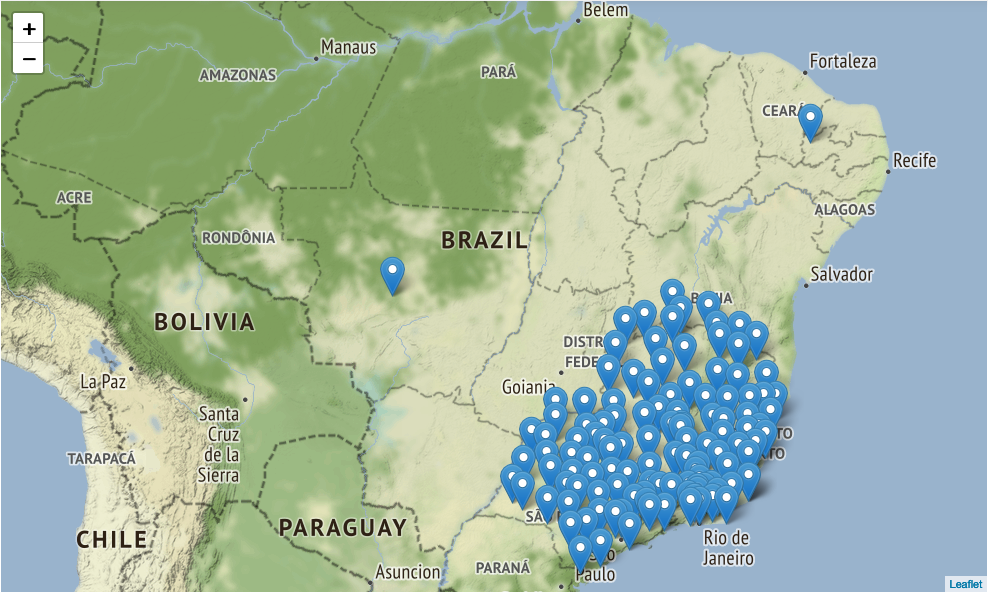

In [5]:
from IPython.display import Image
Image(filename='Brazil_map.png')

- Two other weather stations, Rio Claro and SÃO GONÇALO, had wrong geographic information.  In both cases, the lat & lon shown are for a different town in a different state, with the same name. Lat, lon & elvt were updated with correct information from Wikipedia.

### Interpolation Example

- Temp at Station 384 (Rio de Janeiro) chosen to illustrate the interpolation process

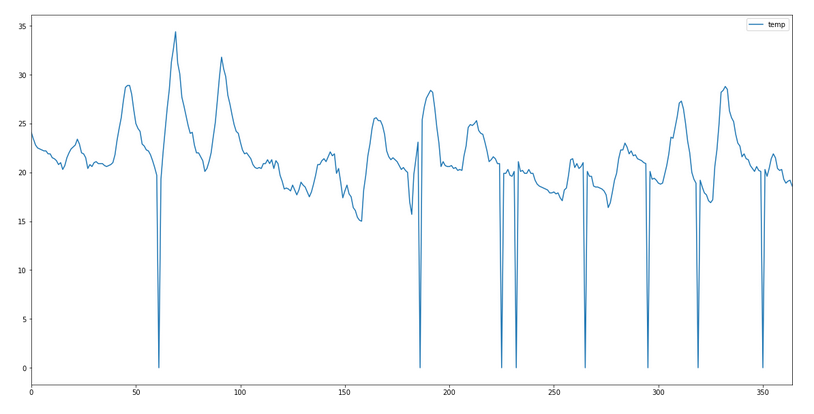

In [8]:
Image(filename='Temp_uncorrected.png')


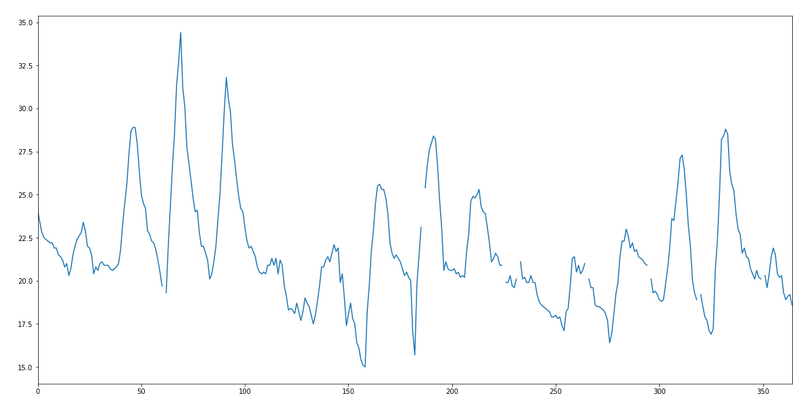

In [9]:
Image(filename='Temp_NaN.png')

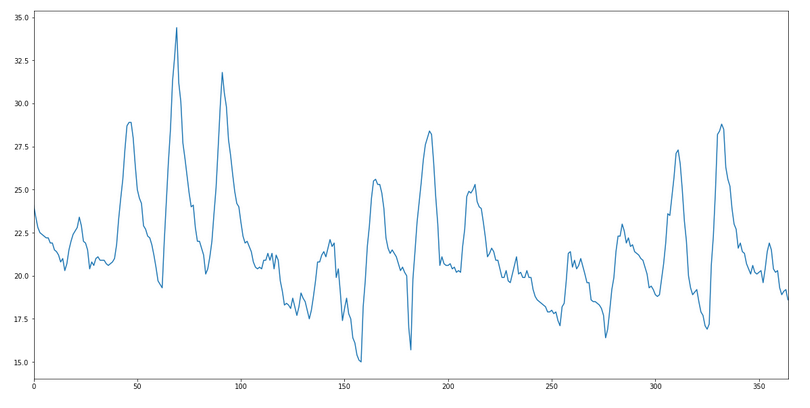

In [10]:
Image(filename='Temp_interpolated.png')

### Temperature & Humidity

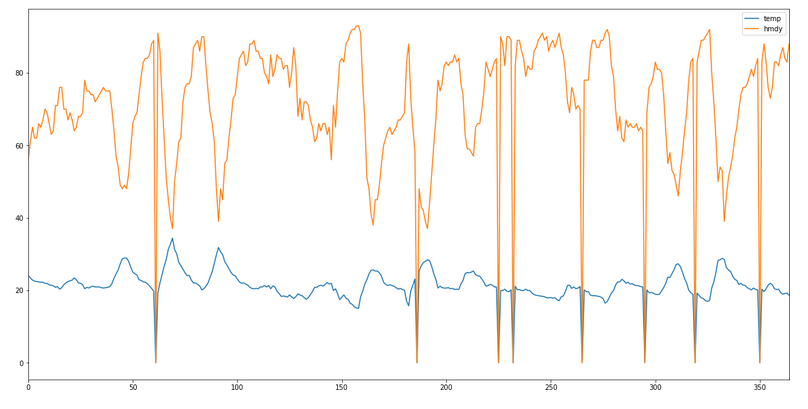

In [12]:
Image(filename='TempHmdy_384.png')

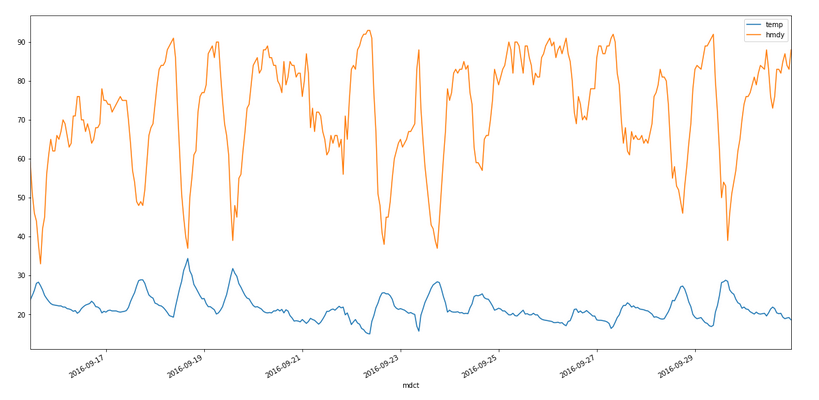

In [13]:
Image(filename='TempHmdy_384_int.png')

### Precipitation Summay

-Monthly precipitation for Station 385

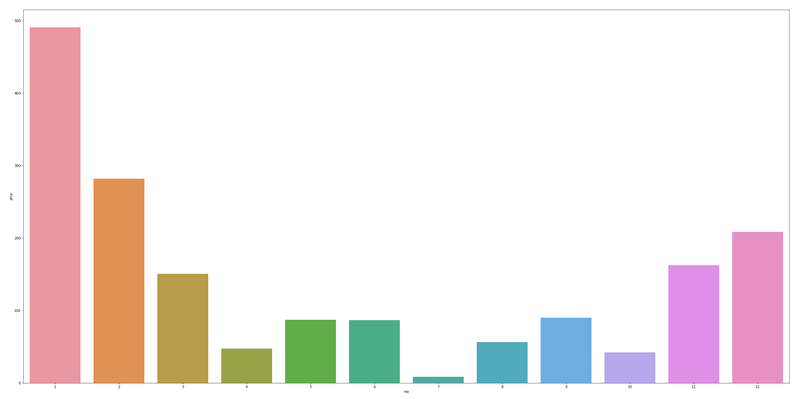

In [11]:
Image(filename='Prcp_385.png')

### Wind Speed & Direction

- Highest (Petrópolis) and Lowest (Arraial do Cabo) Points

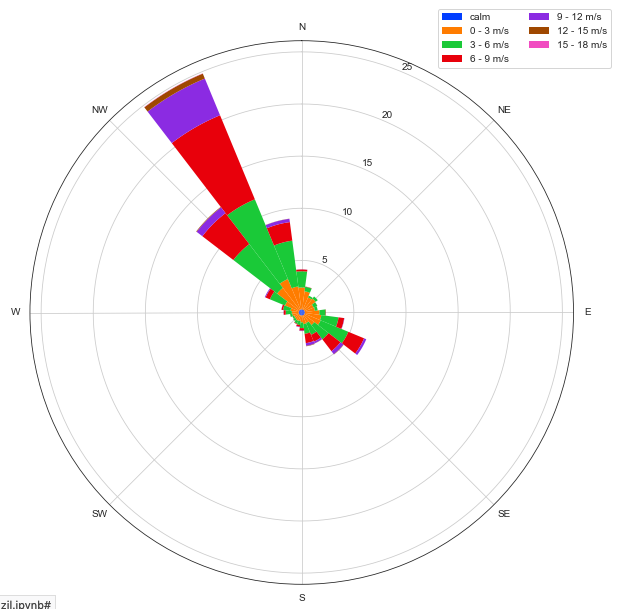

In [14]:
Image(filename='WindRose_379.png')

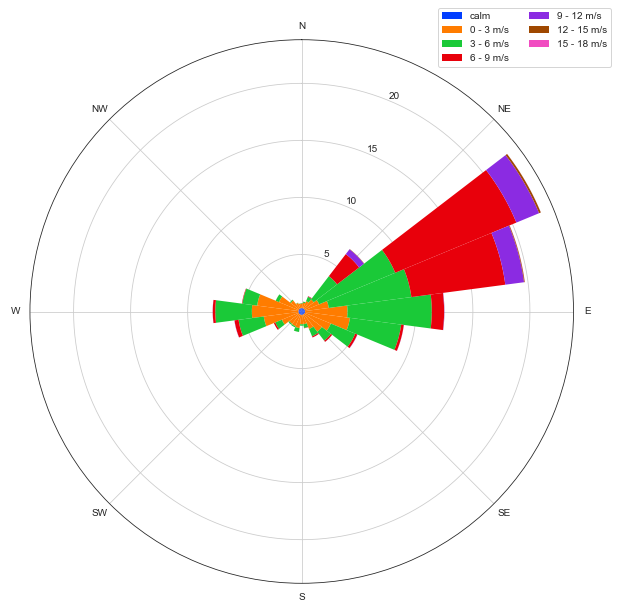

In [15]:
Image(filename='WindRose_375.png')

bibliography:
   
- https://nbviewer.jupyter.org/github/mccrayc/tutorials/blob/master/1_intro/Intro%20to%20Python%20Programming%20-%2021%20Feb%202018.ipynb

- https://opensource.com/article/17/9/messy-sensor-data

- https://www.dataquest.io/blog/tutorial-time-series-analysis-pandas/

    